# Yahoo Finance 

### Task 1 Data retrival


In [1]:
import yfinance as yf
import pandas as pd

def get_historical_stock_data(symbols, start_date, end_date):
    stock_data = pd.DataFrame()
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        stock_info = stock.history(start=start_date, end=end_date)
        if not stock_info.empty:
            stock_data[symbol] = stock_info['Close']
        else:
            print(f"No data available for {symbol}.")
    return stock_data

# List of stock symbols for five companies
company_symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "FB"]

# Date range for the historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetching historical stock data
historical_stock_data = get_historical_stock_data(company_symbols, start_date, end_date)

# Displaying the fetched data
print(historical_stock_data.head())


FB: No timezone found, symbol may be delisted


No data available for FB.
                                 AAPL        MSFT      GOOGL       AMZN
Date                                                                   
2023-01-03 00:00:00-05:00  124.538658  237.956345  89.120003  85.820000
2023-01-04 00:00:00-05:00  125.823189  227.547363  88.080002  85.139999
2023-01-05 00:00:00-05:00  124.488876  220.803360  86.199997  83.120003
2023-01-06 00:00:00-05:00  129.069321  223.405594  87.339996  86.080002
2023-01-09 00:00:00-05:00  129.597061  225.580765  88.019997  87.360001


In [3]:
import yfinance as yf
import pandas as pd

def get_historical_stock_data(symbols, start_date, end_date):
    stock_data = pd.DataFrame()
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        stock_info = stock.history(start=start_date, end=end_date)
        if not stock_info.empty:
            stock_data[symbol] = stock_info['Close']
        else:
            print(f"No data available for {symbol}.")
    return stock_data

# List of stock symbols for five companies
company_symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]

# Date range for the historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetching historical stock data
historical_stock_data = get_historical_stock_data(company_symbols, start_date, end_date)

# Save the DataFrame to a CSV file
csv_filename = "stock_data.csv"
historical_stock_data.to_csv(csv_filename)

print(f"Stock data saved to {csv_filename}")


Stock data saved to stock_data.csv


In [4]:
df = pd.read_csv('stock_data.csv')
df.head()

,Date,AAPL,MSFT,GOOGL,AMZN,TSLA
0,2023-01-03 00:00:00-05:00,124.538658,237.956329,89.120003,85.820000,108.099998
1,2023-01-04 00:00:00-05:00,125.823189,227.547348,88.080002,85.139999,113.639999
2,2023-01-05 00:00:00-05:00,124.488876,220.803375,86.199997,83.120003,110.339996
3,2023-01-06 00:00:00-05:00,129.069336,223.405624,87.339996,86.080002,113.059998
4,2023-01-09 00:00:00-05:00,129.597076,225.580765,88.019997,87.360001,119.769997


# Task 2 Basic Analytics

In [9]:
import yfinance as yf
import pandas as pd

def get_historical_stock_data(symbols, start_date, end_date):
    stock_data = pd.DataFrame()
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        stock_info = stock.history(start=start_date, end=end_date)
        if not stock_info.empty:
            stock_data[symbol] = stock_info['Close']
    return stock_data

symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
start_date = "2023-01-01"
end_date = "2023-10-31"

data = get_historical_stock_data(symbols, start_date, end_date)
returns = data.pct_change().dropna()

print(f"Average Daily Return:{returns.mean()}")

print(f"\nVolatility (Standard Deviation of Daily Return):\n{returns.std()}")

print(f"\nCorrelation between Stocks:\n{returns.corr()}")

Average Daily Return:AAPL     0.001598
MSFT     0.001825
GOOGL    0.001817
AMZN     0.002351
TSLA     0.003502
dtype: float64

Volatility (Standard Deviation of Daily Return):
AAPL     0.013131
MSFT     0.016684
GOOGL    0.020112
AMZN     0.022147
TSLA     0.034530
dtype: float64

Correlation between Stocks:
           AAPL      MSFT     GOOGL      AMZN      TSLA
AAPL   1.000000  0.543976  0.540753  0.432130  0.453650
MSFT   0.543976  1.000000  0.506021  0.574216  0.340080
GOOGL  0.540753  0.506021  1.000000  0.609724  0.350265
AMZN   0.432130  0.574216  0.609724  1.000000  0.387387
TSLA   0.453650  0.340080  0.350265  0.387387  1.000000


# Task 3 Moving Averages

Simple moving average

In [10]:
import yfinance as yf
import pandas as pd

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info

# Fetch historical stock data for a single stock (e.g., Apple Inc.)
stock_symbol = "AAPL"  # Example stock symbol
start_date = "2023-01-01"
end_date = "2023-10-31"

stock_data = get_historical_stock_data(stock_symbol, start_date, end_date)

# Calculate Simple Moving Average (SMA) for 50 days
sma_period = 50
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_period).mean()

# Display the stock data with SMA
print(stock_data[['Close', 'SMA']])


                                Close         SMA
Date                                             
2023-01-03 00:00:00-05:00  124.538658         NaN
2023-01-04 00:00:00-05:00  125.823189         NaN
2023-01-05 00:00:00-05:00  124.488876         NaN
2023-01-06 00:00:00-05:00  129.069321         NaN
2023-01-09 00:00:00-05:00  129.597061         NaN
...                               ...         ...
2023-10-24 00:00:00-04:00  173.440002  177.340201
2023-10-25 00:00:00-04:00  171.100006  177.213201
2023-10-26 00:00:00-04:00  166.889999  177.019601
2023-10-27 00:00:00-04:00  168.220001  176.904001
2023-10-30 00:00:00-04:00  170.289993  176.820001

[208 rows x 2 columns]


Exponential moving average

In [11]:
import yfinance as yf
import pandas as pd

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info

# Fetch historical stock data for a single stock (e.g., Apple Inc.)
stock_symbol = "TSLA"  # Example stock symbol
start_date = "2023-01-01"
end_date = "2023-10-31"

stock_data = get_historical_stock_data(stock_symbol, start_date, end_date)

# Calculate Exponential Moving Average (EMA) for 20 days
ema_period = 20
stock_data['EMA'] = stock_data['Close'].ewm(span=ema_period, adjust=False).mean()

# Display the stock data with EMA
print(stock_data[['Close', 'EMA']])


                                Close         EMA
Date                                             
2023-01-03 00:00:00-05:00  108.099998  108.099998
2023-01-04 00:00:00-05:00  113.639999  108.627618
2023-01-05 00:00:00-05:00  110.339996  108.790701
2023-01-06 00:00:00-05:00  113.059998  109.197301
2023-01-09 00:00:00-05:00  119.769997  110.204224
...                               ...         ...
2023-10-24 00:00:00-04:00  216.520004  241.516455
2023-10-25 00:00:00-04:00  212.419998  238.745364
2023-10-26 00:00:00-04:00  205.759995  235.603900
2023-10-27 00:00:00-04:00  207.300003  232.908291
2023-10-30 00:00:00-04:00  197.360001  229.522739

[208 rows x 2 columns]


Stock buy and sell trends

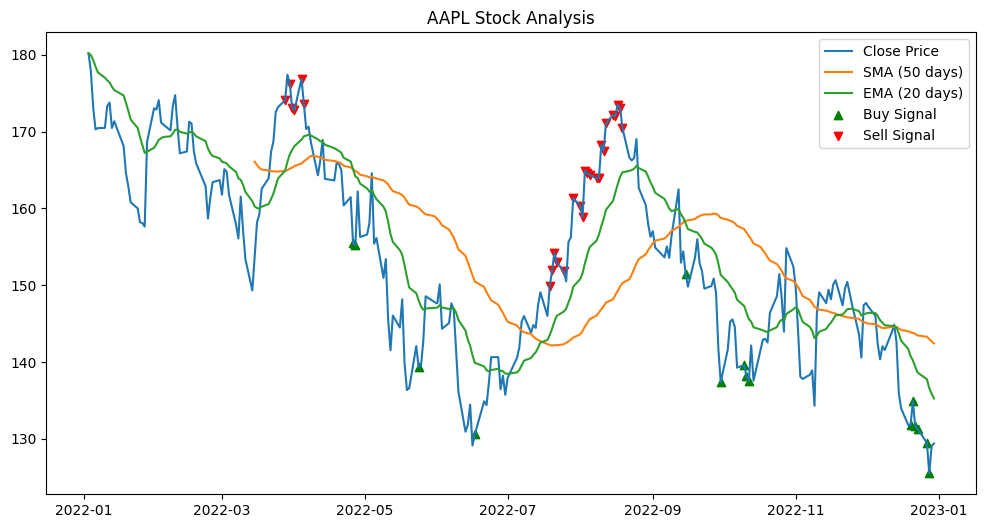

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info

# Fetch historical stock data for a single stock (e.g., Apple Inc.)
stock_symbol = "AAPL"  # Example stock symbol
start_date = "2022-01-01"
end_date = "2023-01-01"

stock_data = get_historical_stock_data(stock_symbol, start_date, end_date)

# Calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
sma_period = 50
ema_period = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=sma_period).mean()
stock_data['EMA'] = stock_data['Close'].ewm(span=ema_period, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = stock_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
rsi = 100 - (100 / (1 + rs))
stock_data['RSI'] = rsi

# Plotting the data and indicators
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA'], label=f'SMA ({sma_period} days)')
plt.plot(stock_data['EMA'], label=f'EMA ({ema_period} days)')
plt.title(f'{stock_symbol} Stock Analysis')
plt.legend()

# Identifying potential buy/sell points based on SMA, EMA, and RSI
buy_points = ((stock_data['SMA'] > stock_data['EMA']) & (stock_data['RSI'] < 30))
sell_points = ((stock_data['SMA'] < stock_data['EMA']) & (stock_data['RSI'] > 70))

plt.scatter(stock_data[buy_points].index, stock_data['Close'][buy_points], marker='^', color='g', label='Buy Signal')
plt.scatter(stock_data[sell_points].index, stock_data['Close'][sell_points], marker='v', color='r', label='Sell Signal')

plt.legend()
plt.show()


# Task 4 Portfolio allocation

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info['Close']

# Define the stocks and their respective allocation weights
stocks = {
    'AAPL': 0.4,
    'MSFT': 0.3,
    'GOOGL': 0.2,
    'AMZN': 0.1
}

# Date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetch historical stock data for the selected stocks
stock_closing_prices = pd.DataFrame()
for stock, weight in stocks.items():
    stock_closing_prices[stock] = get_historical_stock_data(stock, start_date, end_date)

# Calculate daily returns of the stocks
daily_returns = stock_closing_prices.pct_change().dropna()

# Calculate expected returns of individual stocks
expected_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Calculate the covariance matrix
cov_matrix = daily_returns.cov() * 252  # Annualize covariance matrix

# Calculate portfolio expected return
portfolio_expected_return = np.sum(expected_returns * np.array(list(stocks.values())))

# Calculate portfolio risk (standard deviation)
weights = np.array(list(stocks.values()))
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print("Expected returns of individual stocks:")
print(expected_returns)
print("\nPortfolio Expected Return:", portfolio_expected_return)
print("Portfolio Risk:", portfolio_volatility)


Expected returns of individual stocks:
AAPL     0.402784
MSFT     0.459823
GOOGL    0.457854
AMZN     0.592510
dtype: float64

Portfolio Expected Return: 0.44988249569896543
Portfolio Risk: 0.2125016694914385


# Task 5 Risk Return Analysis

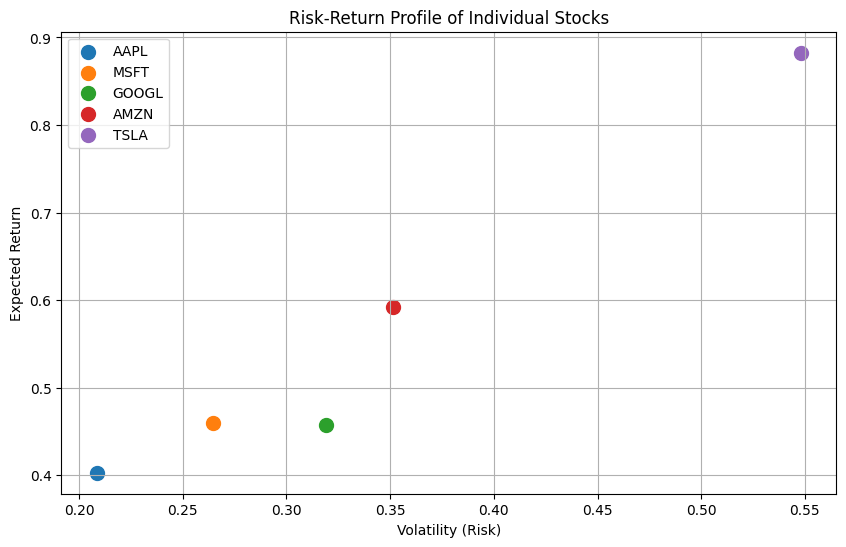

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info['Close']

# Define the stocks
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Initialize lists to store returns and volatility for different stocks
stock_returns = []
stock_volatility = []

for stock in stocks:
    stock_prices = get_historical_stock_data(stock, start_date, end_date)
    daily_returns = stock_prices.pct_change().dropna()

    # Calculate expected return of the stock
    expected_return = daily_returns.mean() * 252  # Assuming 252 trading days in a year
    stock_returns.append(expected_return)

    # Calculate volatility (standard deviation) of the stock
    volatility = daily_returns.std() * np.sqrt(252)  # Annualized standard deviation
    stock_volatility.append(volatility)

# Plotting the risk-return profile for individual stocks
plt.figure(figsize=(10, 6))
for i, stock in enumerate(stocks):
    plt.scatter(stock_volatility[i], stock_returns[i], label=stock, s=100)

plt.title('Risk-Return Profile of Individual Stocks')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


# Task 6 Performance Metrics

Sharpe Ratio 
Sortino Ratio
Jensens Alpha

Combined code

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info['Close']

# Define the stocks and their respective allocation weights
stocks = {
    'AAPL': 0.3,
    'MSFT': 0.3,
    'GOOGL': 0.2,
    'AMZN': 0.2,
    'TSLA': 0.1 
}

# Date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetch historical stock data for the selected stocks
stock_closing_prices = pd.DataFrame()
for stock, weight in stocks.items():
    stock_closing_prices[stock] = get_historical_stock_data(stock, start_date, end_date)

# Calculate daily returns of the stocks
daily_returns = stock_closing_prices.pct_change().dropna()

# Calculate expected returns of individual stocks
expected_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Calculate market return (e.g., S&P 500 or market proxy)
market_return = get_historical_stock_data('SPY', start_date, end_date).pct_change().dropna()

# Ensure market return and daily returns have the same length
# Trim or align the market return data to match the length of daily returns
market_return = market_return.tail(len(daily_returns))

# Calculate excess returns of portfolio over market return
excess_returns = expected_returns - market_return.mean() * 252

# Calculate CAPM Beta using linear regression
beta, alpha, _, _, _ = stats.linregress(market_return, daily_returns.mean(axis=1) - market_return)

# Assuming risk-free rate is 0 for this example
risk_free_rate = 0

# Calculate CAPM Expected Return
CAPM_expected_return = risk_free_rate + beta * (market_return.mean() * 252 - risk_free_rate)

# Calculate Jensen's Alpha
jensens_alpha = (expected_returns - CAPM_expected_return).sum()

# Calculate downside deviation (standard deviation of negative returns)
downside_returns = daily_returns.copy()
downside_returns[downside_returns > 0] = 0  # Set positive returns to 0
downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(252)  # Annualize downside deviation

# Calculate Sortino Ratio
sortino_ratio = (expected_returns - 0) / downside_deviation  # Assume risk-free rate is 0

# Calculate portfolio expected return
portfolio_weights = np.array(list(stocks.values()))
portfolio_return = np.sum(expected_returns * portfolio_weights)

# Calculate portfolio risk (standard deviation)
portfolio_variance = np.dot(portfolio_weights.T, np.dot(daily_returns.cov() * 252, portfolio_weights))
portfolio_volatility = np.sqrt(portfolio_variance)

# Calculate Sharpe Ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

# Output all metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio.sum())
print("Jensen's Alpha:", jensens_alpha)


Sharpe Ratio: 2.196845015146063
Sortino Ratio: 13.215072463120443
Jensen's Alpha: 2.4498091846787395


# Task 7 Visualizing and Reporting

Line chart

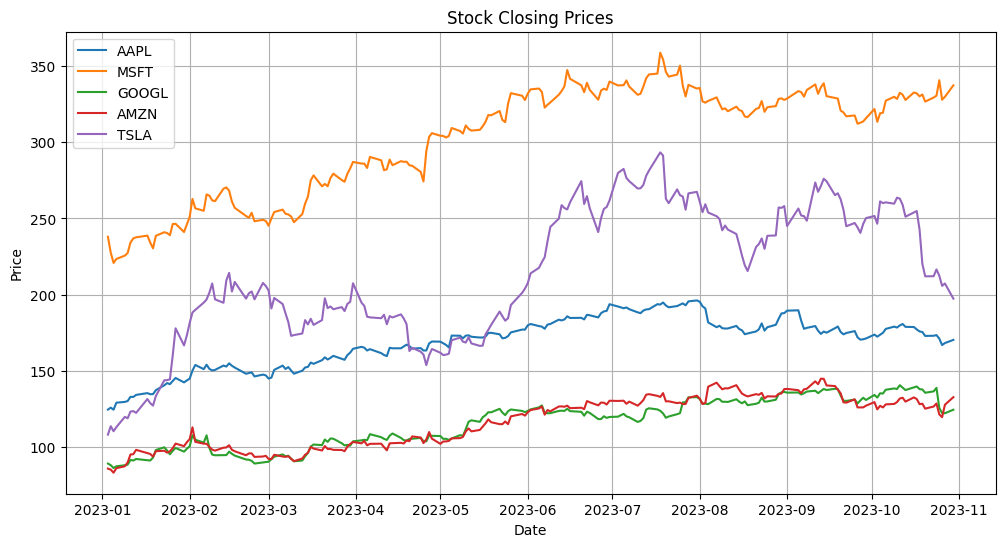


Key Financial Metrics:

AAPL
Mean Close Price: 168.8362887455867
Standard Deviation of Close Price: 16.941754590272772
Max Close Price: 196.18507385253906
Min Close Price: 124.48887634277344

MSFT
Mean Close Price: 301.89186279590314
Standard Deviation of Close Price: 35.718230331653295
Max Close Price: 358.73046875
Min Close Price: 220.80335998535156

GOOGL
Mean Close Price: 115.68307711527898
Standard Deviation of Close Price: 15.91034941917003
Max Close Price: 140.5500030517578
Min Close Price: 86.19999694824219

AMZN
Mean Close Price: 116.35105800628662
Standard Deviation of Close Price: 16.552406350728
Max Close Price: 144.85000610351562
Min Close Price: 83.12000274658203

TSLA
Mean Close Price: 213.49788423684927
Standard Deviation of Close Price: 44.46966143007624
Max Close Price: 293.3399963378906
Min Close Price: 108.0999984741211


In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info

# Define the stocks for the portfolio
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetch historical stock data for the selected stocks
stock_data = {}
for stock in stocks:
    stock_data[stock] = get_historical_stock_data(stock, start_date, end_date)

# Plotting stock data - Adjust this part for each specific visualization needed
plt.figure(figsize=(12, 6))

# Plot stock closing prices
for stock, data in stock_data.items():
    plt.plot(data['Close'], label=stock)

plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print key financial metrics
print("\nKey Financial Metrics:")
for stock, data in stock_data.items():
    print(f"\n{stock}")
    print("Mean Close Price:", data['Close'].mean())
    print("Standard Deviation of Close Price:", data['Close'].std())
    print("Max Close Price:", data['Close'].max())
    print("Min Close Price:", data['Close'].min())


# Task 8 Investment recommendations

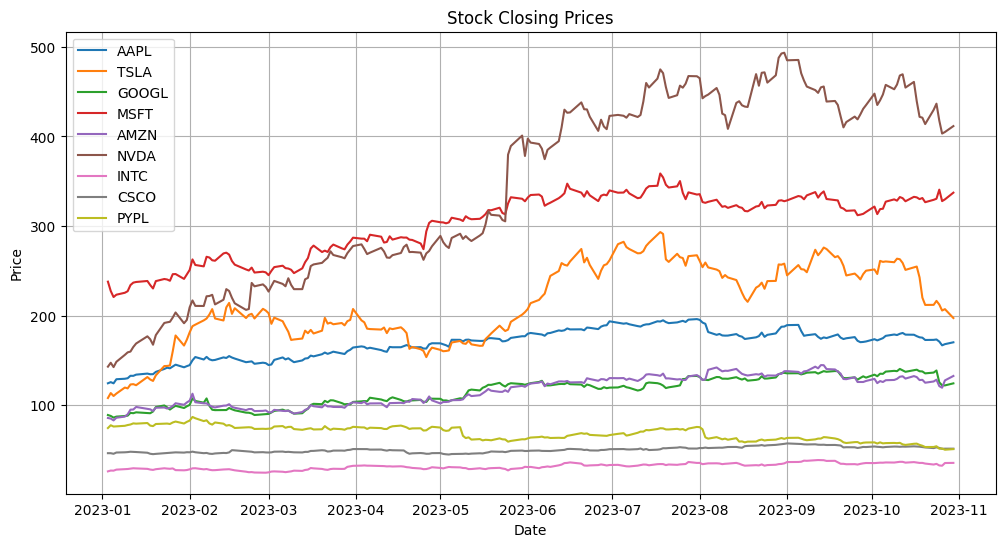

Consider investing in AAPL as it is showing an upward trend.
Exercise caution for TSLA as it is not exhibiting a consistent upward trend.
Consider investing in GOOGL as it is showing an upward trend.
Consider investing in MSFT as it is showing an upward trend.
Consider investing in AMZN as it is showing an upward trend.
Consider investing in NVDA as it is showing an upward trend.
Consider investing in INTC as it is showing an upward trend.
Consider investing in CSCO as it is showing an upward trend.
Exercise caution for PYPL as it is not exhibiting a consistent upward trend.


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_61015/3027677946.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Close'][-1] > data['Close'].mean():


In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical stock data for a single symbol
def get_historical_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    stock_info = stock.history(start=start_date, end=end_date)
    return stock_info

# Define the stocks for the portfolio
stocks =  ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMZN', 'NVDA', 'INTC', 'CSCO', 'PYPL']

# Date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetch historical stock data for the selected stocks
stock_data = {}
for stock in stocks:
    stock_data[stock] = get_historical_stock_data(stock, start_date, end_date)

# Plotting stock data - Line chart
plt.figure(figsize=(12, 6))

# Plot stock closing prices
for stock, data in stock_data.items():
    plt.plot(data['Close'], label=stock)

plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Generate simple recommendations based on visual analysis
for stock, data in stock_data.items():
    if data['Close'][-1] > data['Close'].mean():
        print(f"Consider investing in {stock} as it is showing an upward trend.")
    else:
        print(f"Exercise caution for {stock} as it is not exhibiting a consistent upward trend.")


In [39]:
import yfinance as yf
def screen_stocks(symbols):
    suggested_stocks = []
    for symbol in symbols:
        hist_last_month = yf.download(symbol, period='1mo')
        if not hist_last_month.empty:
            if hist_last_month['Close'].iloc[0] < hist_last_month['Close'].iloc[-1]:
                suggested_stocks.append(symbol)
    
    return suggested_stocks
nasdaq_symbols = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMZN', 'NVDA', 'INTC', 'CSCO', 'PYPL']
potential_stocks = screen_stocks(nasdaq_symbols)
print("Suggested Stocks based on Price Trend within the Last Month:")
print(potential_stocks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Suggested Stocks based on Price Trend within the Last Month:
['AAPL', 'MSFT', 'AMZN', 'NVDA', 'INTC']
